# Dimensionality Reduction

In this exercise, we will learn several dimensionality reduction methods using the Penguin dataset.

## Preprocessing


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import sparse

# Load the penguins dataset
data_table = sns.load_dataset("penguins")
data_table.head()

# Impute the missing values
for column in data_table.columns:
    data_table[column] = data_table[column].fillna(
        data_table[column].dropna().mode()[0]
    )

categorical_cols = ["island", "sex"]
prep_data_table = pd.get_dummies(data_table, columns=categorical_cols, drop_first=True)

X = prep_data_table.drop(columns=["species"]).values.astype(float)
y = prep_data_table["species"].values
feature_cols = prep_data_table.drop(columns=["species"]).columns

X = X.astype(float)
ylabel, yids = np.unique(y, return_inverse=True)

# Multi Dimensional Scaling (MDS)


Let's apply the MDS using scikit learn package: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html


Text(0, 0.5, '')

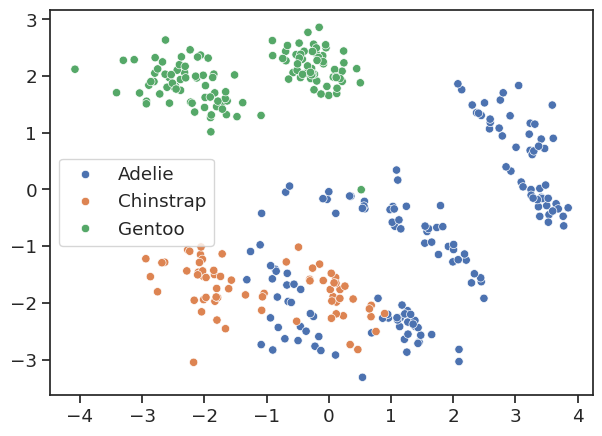

In [5]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# TODO: See the documentation for the MDS function and use it to project the data into 2D
embedding = MDS(n_components=2, normalized_stress='auto')
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

X_proj = embedding.fit_transform(X_transformed)

# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")

### Why was MDS not useful for this dataset? Can you think of any way to imporve the results 🤔?


In [3]:
# TODO: Fidn a way to show the structure for this dataset.

# Isomap

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html


/home/vscode/venv/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/vscode/venv/lib/python3.9/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/vscode/venv/lib/python3.9/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/vscode/venv/lib/python3.9/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/vscode/ve

Text(0, 0.5, '')

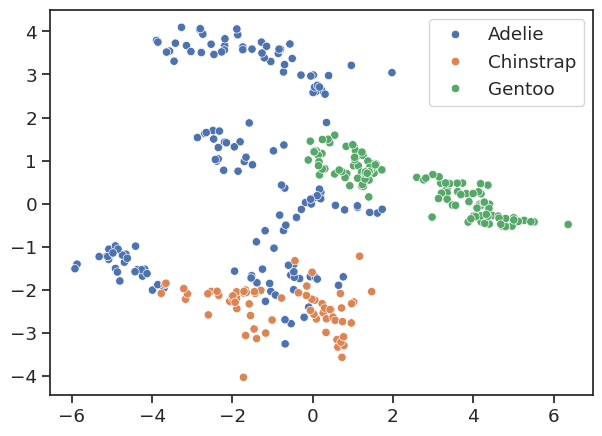

In [8]:
from sklearn.manifold import Isomap

# TODO: See the documentation for the MDS function and use it to project the data into 2D
embedding = Isomap(n_components=2)
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

X_proj = embedding.fit_transform(X_transformed)

# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")

### Play with the number of neighbors and think about it's effect. Can you also explain why the effect is observed 🤔?


# t-SNE


https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


Text(0, 0.5, '')

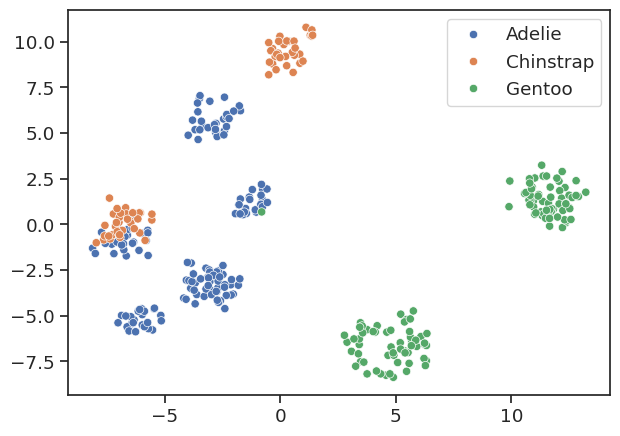

In [10]:
from sklearn.manifold import TSNE

# TODO: See the documentation for the MDS function and use it to project the data into 2D
embedding = TSNE(n_components=3)
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

X_proj = embedding.fit_transform(X_transformed)

# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")

# UMAP (Optional)
* https://umap-learn.readthedocs.io/en/latest/api.html


Text(0, 0.5, '')

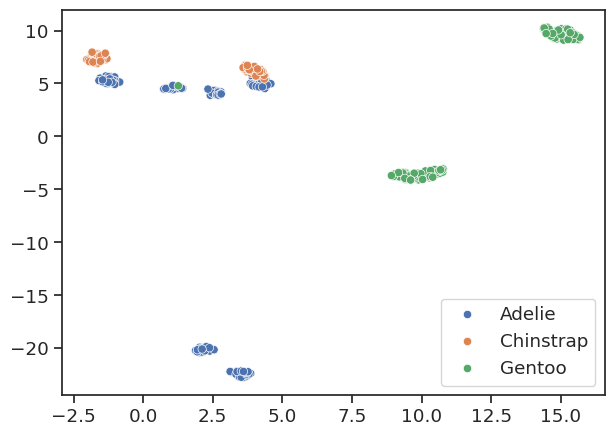

In [12]:
import umap


# TODO: See the documentation for the MDS function and use it to project the data into 2D
embedding = umap.UMAP(n_components=2, n_neighbors=100)
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

X_proj = embedding.fit_transform(X_transformed)

# Visualize the results
sns.set_style("white")
sns.set(font_scale=1.2)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=y)

# Label your axis.
ax.set_xlabel("")
ax.set_ylabel("")